In [1]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore
from tensorflow.keras.layers.experimental import RandomFourierFeatures
from plot_keras_history import show_history, plot_history

In [13]:
%store -r final_df
final_df

Temp  Humidity  Wind  Rain  ISI  Actual Fire
0     8.2      51.0   6.7   0.0  5.1          0.0
1    18.0      33.0   0.9   0.0  6.7          0.0
2    14.6      33.0   1.3   0.0  6.7          0.0
3     8.3      97.0   4.0   0.2  9.0          0.0
4    11.4      99.0   1.8   0.0  9.6          0.0
..    ...       ...   ...   ...  ...          ...
756  30.0      65.0  14.0   0.0  4.5          1.0
757  28.0      87.0  15.0   4.4  0.1          0.0
758  27.0      87.0  29.0   0.5  0.4          0.0
759  24.0      54.0  18.0   0.1  1.7          0.0
760  24.0      64.0  15.0   0.2  1.2          0.0

[760 rows x 6 columns]

In [14]:
final_df_remove_outliers = final_df[(np.abs(zscore(final_df)) < 3).all(axis=1)]

final_df.index.difference(final_df_remove_outliers.index)

Int64Index([ 11,  22, 266, 499, 519, 608, 609, 610, 621, 622, 633, 640, 655,
            656, 657, 676, 735, 736, 757, 758],
           dtype='int64')

In [193]:
# Normalize columns as to not deal with different units
import pandas as pd
from sklearn import preprocessing

x = final_df_remove_outliers.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
final_df_scaled = pd.DataFrame(x_scaled)
# final_df_remove_outliers = final_df_remove_outliers / final_df_remove_outliers.max()

In [194]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from keras.layers import Dense, Input, Dropout
import tensorflow_addons as tfa
from keras.regularizers import L1L2

In [195]:
classification_x = final_df_scaled.iloc[:,: -2].values
classification_y = final_df_scaled.iloc[:,-1 :].values

In [232]:
X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(classification_x,classification_y, test_size=0.25, random_state=0)

In [303]:
inputs = Input(shape=(4,))
layer_class = Dense(4, kernel_regularizer=L1L2(l1=0.0, l2=0.3),activation='sigmoid',name='layer1')(inputs)
layer_class = Dropout(0.1)(layer_class)
layer_class = Dense(8, kernel_regularizer=L1L2(l1=0.0, l2=0.3),activation='sigmoid',name='layer2')(layer_class)
layer_class = Dropout(0.2)(layer_class)
layer_class = Dense(4, kernel_regularizer=L1L2(l1=0.0, l2=0.3),activation='sigmoid',name='layer3')(layer_class)
layer_class = Dropout(0.1)(layer_class)
output_class = Dense(1, activation='sigmoid',name='classification')(layer_class)

c_model = Model(inputs=inputs, outputs=[output_class],name="single_model")

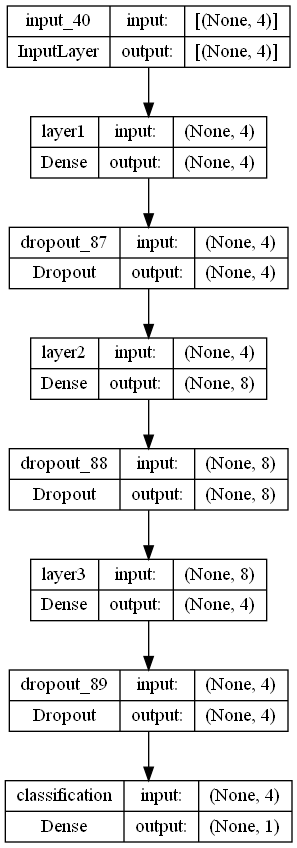

In [304]:
keras.utils.plot_model(c_model, "single_model.png", show_shapes=True)

In [305]:
from keras import metrics
c_model.compile(
    loss=['binary_crossentropy'],
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=["binary_accuracy"]
)

In [306]:
history = c_model.fit(x=X_train_cl,y=y_train_cl,verbose=0, epochs = 100, validation_data=(X_test_cl, y_test_cl))

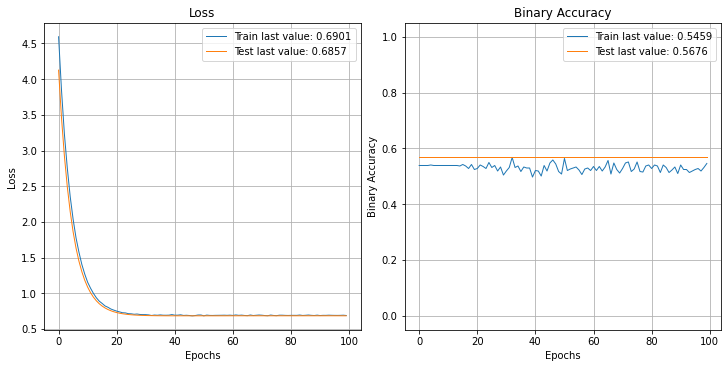

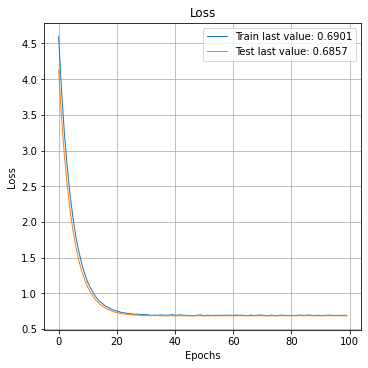

In [307]:
show_history(history)
plot_history(history,single_graphs=True)
plt.close()